Using data

H2O
                     Lines parsed: 368
CO2
                     Lines parsed: 2664

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 368
PROCESSED
{'air': 1.0}
0.105393 seconds elapsed for abscoef; nlines = 368

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
Header written to data/CO2.header
END DOWNLOAD
                     Lines parsed: 2664
PROCESSED
{'air': 1.0}
0.584087 seconds elapsed for abscoef; nlines = 2664


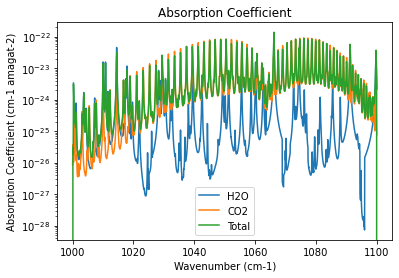

In [4]:
from hapi import *
import matplotlib.pyplot as plt
import numpy as np

# Function to fetch and plot data
def fetch_and_plot(molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis):

    db_begin('data')

    # Create a dictionary to store the spectra
    spectra = {}

    # Fetch and store the data for each molecule
    for molecule, (molecule_number, isotopologue_number, ratio) in molecules.items():
        try:
            fetch(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound)
            nu, coef = absorptionCoefficient_Lorentz(SourceTables=molecule)
            spectra[molecule] = (nu, coef * ratio)
        except Exception as e:
            print(f"An error occurred while fetching data for {molecule}: {e}")

    # Create a plot for each molecule
    for molecule, (nu, coef) in spectra.items():
        plt.plot(nu, coef, label=molecule)

    # Create a plot for the total spectrum
    nu_total = np.linspace(lower_wavenumber_bound, upper_wavenumber_bound, 1000)
    coef_total = np.zeros_like(nu_total)
    for nu, coef in spectra.values():
        coef_total += np.interp(nu_total, nu, coef, left=0, right=0)
    plt.plot(nu_total, coef_total, label='Total')

    # Display the plot
    plt.title("Absorption Coefficient")
    plt.xlabel("Wavenumber (cm-1)")
    plt.ylabel("Absorption Coefficient (cm-1 amagat-2)")
    if y_axis.lower() == 'log':
        plt.yscale('log')
    plt.legend()
    plt.show()

# Function to handle user input
def user_input():
    molecules = {}
    while True:
        molecule = input("Choose your molecule (or type 'done' to finish): ")
        if molecule.lower() == 'done':
            break
        molecule_number = int(input("Choose your molecule number: "))
        isotopologue_number = int(input("Choose your isotopologue number: "))
        ratio = float(input("Enter the volume mixing ratio for this molecule: "))
        molecules[molecule] = (molecule_number, isotopologue_number, ratio)
    lower_wavenumber_bound = int(input("Choose your lower wavenumber bound: "))
    upper_wavenumber_bound = int(input("Choose your upper wavenumber bound: "))
    y_axis = input('Scale (Log or Linear): ')
    return molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis

# Call the functions
molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis = user_input()
fetch_and_plot(molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis)


Using data

H2O
                     Lines parsed: 368
CO2
                     Lines parsed: 2664

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 368
PROCESSED
{'air': 1.0}
0.104897 seconds elapsed for abscoef; nlines = 368

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
Header written to data/CO2.header
END DOWNLOAD
                     Lines parsed: 2664
PROCESSED
{'air': 1.0}
0.586917 seconds elapsed for abscoef; nlines = 2664


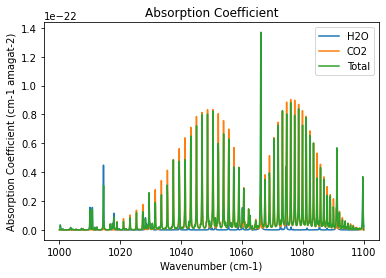

In [5]:
from hapi import *
import matplotlib.pyplot as plt
import numpy as np

# Function to fetch and plot data
def fetch_and_plot(molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis):

    db_begin('data')

    # Create a dictionary to store the spectra
    spectra = {}

    # Fetch and store the data for each molecule
    for molecule, (molecule_number, isotopologue_number, ratio) in molecules.items():
        try:
            fetch(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound)
            nu, coef = absorptionCoefficient_Lorentz(SourceTables=molecule)
            spectra[molecule] = (nu, coef * ratio)
        except Exception as e:
            print(f"An error occurred while fetching data for {molecule}: {e}")

    # Create a plot for each molecule
    for molecule, (nu, coef) in spectra.items():
        plt.plot(nu, coef, label=molecule)

    # Create a plot for the total spectrum
    nu_total = np.linspace(lower_wavenumber_bound, upper_wavenumber_bound, 1000)
    coef_total = np.zeros_like(nu_total)
    for nu, coef in spectra.values():
        coef_total += np.interp(nu_total, nu, coef, left=0, right=0)
    plt.plot(nu_total, coef_total, label='Total')

    # Display the plot
    plt.title("Absorption Coefficient")
    plt.xlabel("Wavenumber (cm-1)")
    plt.ylabel("Absorption Coefficient (cm-1 amagat-2)")
    if y_axis.lower() == 'log':
        plt.yscale('log')
    plt.legend()
    plt.show()

# Define the user inputs
molecules = {
    'H2O': (1, 1, 0.4),
    'CO2': (2, 1, 0.6)
}
lower_wavenumber_bound = 1000
upper_wavenumber_bound = 1100
y_axis = 'Linear'

# Call the function
fetch_and_plot(molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis)


Using data

H2O
                     Lines parsed: 368
CO2
                     Lines parsed: 2664

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 368
PROCESSED
{'air': 1.0}
0.102118 seconds elapsed for abscoef; nlines = 368

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
Header written to data/CO2.header
END DOWNLOAD
                     Lines parsed: 2664
PROCESSED
{'air': 1.0}
0.581308 seconds elapsed for abscoef; nlines = 2664


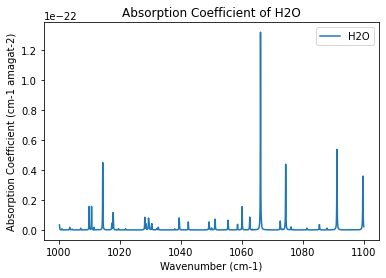

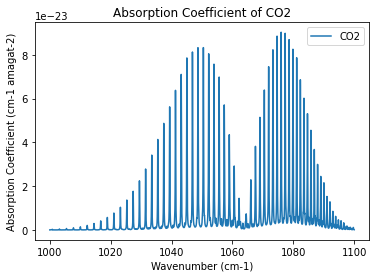

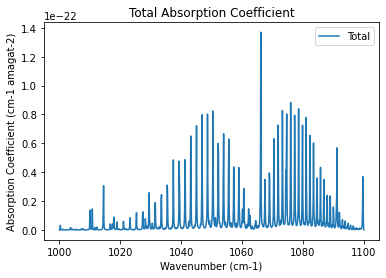

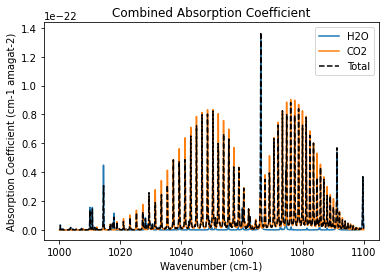

In [6]:
from hapi import *
import matplotlib.pyplot as plt
import numpy as np

# Function to fetch and plot data
def fetch_and_plot(molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis):

    db_begin('data')

    # Create a dictionary to store the spectra
    spectra = {}

    # Fetch and store the data for each molecule
    for molecule, (molecule_number, isotopologue_number, ratio) in molecules.items():
        try:
            fetch(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound)
            nu, coef = absorptionCoefficient_Lorentz(SourceTables=molecule)
            spectra[molecule] = (nu, coef * ratio)
        except Exception as e:
            print(f"An error occurred while fetching data for {molecule}: {e}")

    # Create a plot for each molecule
    for molecule, (nu, coef) in spectra.items():
        plt.figure()
        plt.plot(nu, coef, label=molecule)
        plt.title(f"Absorption Coefficient of {molecule}")
        plt.xlabel("Wavenumber (cm-1)")
        plt.ylabel("Absorption Coefficient (cm-1 amagat-2)")
        if y_axis.lower() == 'log':
            plt.yscale('log')
        plt.legend()
        plt.show()

    # Create a plot for the total spectrum
    nu_total = np.linspace(lower_wavenumber_bound, upper_wavenumber_bound, 1000)
    coef_total = np.zeros_like(nu_total)
    for nu, coef in spectra.values():
        coef_total += np.interp(nu_total, nu, coef, left=0, right=0)
    plt.figure()
    plt.plot(nu_total, coef_total, label='Total')
    plt.title("Total Absorption Coefficient")
    plt.xlabel("Wavenumber (cm-1)")
    plt.ylabel("Absorption Coefficient (cm-1 amagat-2)")
    if y_axis.lower() == 'log':
        plt.yscale('log')
    plt.legend()
    plt.show()

    # Create a combined plot with individual spectra in different colors and the total spectrum
    plt.figure()
    for molecule, (nu, coef) in spectra.items():
        plt.plot(nu, coef, label=molecule)
    plt.plot(nu_total, coef_total, label='Total', color='black', linestyle='--')
    plt.title("Combined Absorption Coefficient")
    plt.xlabel("Wavenumber (cm-1)")
    plt.ylabel("Absorption Coefficient (cm-1 amagat-2)")
    if y_axis.lower() == 'log':
        plt.yscale('log')
    plt.legend()
    plt.show()

# Define the user inputs
molecules = {
    'H2O': (1, 1, 0.4),
    'CO2': (2, 1, 0.6)
}
lower_wavenumber_bound = 1000
upper_wavenumber_bound = 1100
y_axis = 'Linear'

# Call the function
fetch_and_plot(molecules, lower_wavenumber_bound, upper_wavenumber_bound, y_axis)
